<a href="https://colab.research.google.com/github/yeeeeeun/AI_software/blob/main/%EC%9E%85%EB%B9%84%EB%8C%80%EC%B9%AD%EC%9D%B8%EC%8B%9D%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import cv2
import numpy as np

def load_data(data_path, img_size=(128, 128)):
    images = []
    labels = []

    # Stroke 이미지 로드 및 레이블링
    for file in glob.glob(os.path.join(data_path, 'stroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)  # 이미지 리사이즈
        images.append(img)
        labels.append(1)  # Stroke 레이블: 1

    # Non-Stroke 이미지 로드 및 레이블링
    for file in glob.glob(os.path.join(data_path, 'noStroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)  # 이미지 리사이즈
        images.append(img)
        labels.append(0)  # Non-Stroke 레이블: 0

    return np.array(images), np.array(labels)

# 데이터 로드
data_path = '/content/drive/MyDrive/main'
images, labels = load_data(data_path)

print(f"Loaded {len(images)} images with labels.")


Loaded 3935 images with labels.


In [ ]:
import dlib

def get_landmarks(image):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None


File downloaded successfully.


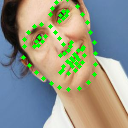

In [ ]:
import os
import requests
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# GitHub에서 파일 다운로드
url = 'https://github.com/GuoQuanhao/68_points/blob/master/shape_predictor_68_face_landmarks.dat?raw=true'
response = requests.get(url)
with open('shape_predictor_68_face_landmarks.dat', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")


# 랜드마크 추출 및 이미지에 그리기
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None

def draw_landmarks(image, landmarks):
    for i in range(0, 68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    return image

# 예제: 첫 번째 이미지에 랜드마크 그리기
example_image = images[0].copy()
landmarks = get_landmarks(example_image)
if landmarks:
    example_image = draw_landmarks(example_image, landmarks)
    cv2_imshow(example_image)  # cv2.imshow 대신 사용
else:
    print("No landmarks detected.")


In [ ]:
import os
import requests
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# GitHub에서 파일 다운로드
url = 'https://github.com/GuoQuanhao/68_points/blob/master/shape_predictor_68_face_landmarks.dat?raw=true'
response = requests.get(url)
with open('shape_predictor_68_face_landmarks.dat', 'wb') as file:
    file.write(response.content)

print("File downloaded successfully.")

# 데이터 로드 함수
def load_data(data_path, img_size=(128, 128)):
    images = []
    labels = []

    for file in glob.glob(os.path.join(data_path, 'stroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(1)

    for file in glob.glob(os.path.join(data_path, 'noStroke_data', '*.jpg')):
        img = cv2.imread(file)
        img = cv2.resize(img, img_size)
        images.append(img)
        labels.append(0)

    return np.array(images), np.array(labels)

# 데이터 로드
data_path = '/content/drive/MyDrive/main'
images, labels = load_data(data_path)

print(f"Loaded {len(images)} images with labels.")

# 랜드마크 추출 및 이미지에 그리기
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)

def get_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        return landmarks
    return None

def calculate_asymmetry(landmarks):
    left_lip = (landmarks.part(48).x, landmarks.part(48).y)
    right_lip = (landmarks.part(54).x, landmarks.part(54).y)
    asymmetry = abs(left_lip[1] - right_lip[1])  # 좌표 차이 계산
    return asymmetry

# 비대칭성 계산 및 데이터셋 구축
X = []  # 특징 (비대칭성)
y = []  # 라벨 (0 또는 1)

for img, label in zip(images, labels):
    landmarks = get_landmarks(img)
    if landmarks:
        asymmetry = calculate_asymmetry(landmarks)
        X.append(asymmetry)
        y.append(label)

X = np.array(X).reshape(-1, 1)
y = np.array(y)

print(f"Feature shape: {X.shape}, Labels shape: {y.shape}")


File downloaded successfully.
Loaded 3935 images with labels.
Feature shape: (2281, 1), Labels shape: (2281,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 모델 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 100s 982ms/step - accuracy: 0.6763 - loss: 72.8511 - val_accuracy: 0.7459 - val_loss: 0.4858
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 93s 940ms/step - accuracy: 0.8193 - loss: 0.3911 - val_accuracy: 0.8399 - val_loss: 0.3499
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 145s 966ms/step - accuracy: 0.9186 - loss: 0.2039 - val_accuracy: 0.8793 - val_loss: 0.3036
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 136s 907ms/step - accuracy: 0.9684 - loss: 0.0987 - val_accuracy: 0.8767 - val_loss: 0.3447
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 144s 931ms/step - accuracy: 0.9787 - loss: 0.0652 - val_accuracy: 0.8818 - val_loss: 0.4288
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 139s 903ms/step - accuracy: 0.9926 - loss: 0.0376 - val_accuracy: 0.8983 - val_loss: 0.4254
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.8844 - val_loss: 0.5531
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9947 - loss: 0.0222 - val_ac

In [ ]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9124 - loss: 0.4115
Test Loss: 0.4535365700721741
Test Accuracy: 0.9072427153587341


In [ ]:
def draw_lip_landmarks(image, landmarks):
    # 입술 양 끝 좌표 추출
    left_lip = (landmarks.part(48).x, landmarks.part(48).y)
    right_lip = (landmarks.part(54).x, landmarks.part(54).y)

    # 이미지에 표시
    cv2.circle(image, left_lip, 3, (0, 255, 0), -1)
    cv2.circle(image, right_lip, 3, (0, 255, 0), -1)

    return image, left_lip, right_lip

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Asymmetry: 12
Prediction: 6.100751054436948e-20
뇌졸중 가능성 낮음


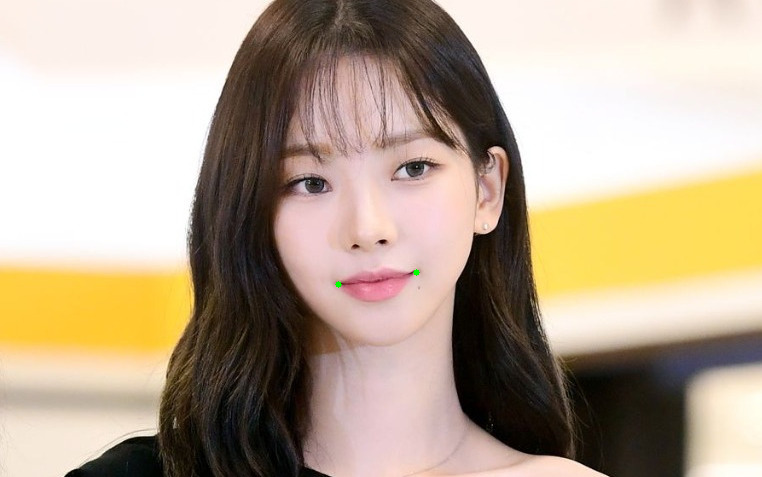

In [ ]:
# 테스트용 프롬프트
def predict_stroke(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    landmarks = get_landmarks(img)

    if landmarks:
        asymmetry = calculate_asymmetry(landmarks)
        input_data = np.expand_dims(img_resized, axis=0)

        # 모델 예측
        prediction = model.predict(input_data)[0][0]

        # 비대칭성과 함께 출력
        if prediction > 0.5:
            result = "뇌졸중 가능성 높음"
        else:
            result = "뇌졸중 가능성 낮음"

        print(f"Asymmetry: {asymmetry}")
        print(f"Prediction: {prediction}")
        print(result)

        # 이미지 표시
        img_with_landmarks = draw_lip_landmarks(img, landmarks)[0]
        cv2_imshow(img_with_landmarks)
    else:
        print("No landmarks detected.")

# 예제 사용법
image_path = '/content/01.36047379.1.jpg'  # 테스트 이미지 경로
predict_stroke(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Asymmetry: 14
Prediction: 0.9905842542648315
뇌졸중 가능성 높음


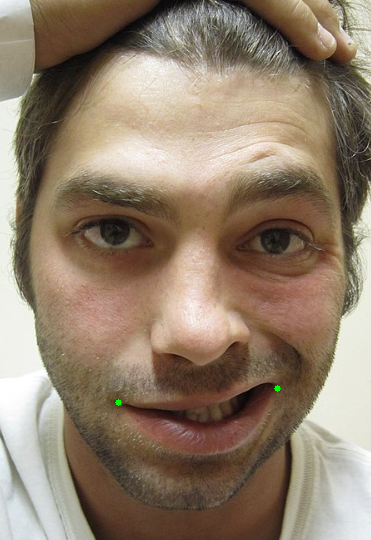

In [ ]:
# 테스트용 프롬프트
def predict_stroke(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (128, 128))
    landmarks = get_landmarks(img)

    if landmarks:
        asymmetry = calculate_asymmetry(landmarks)
        input_data = np.expand_dims(img_resized, axis=0)

        # 모델 예측
        prediction = model.predict(input_data)[0][0]

        # 비대칭성과 함께 출력
        if prediction > 0.5:
            result = "뇌졸중 가능성 높음"
        else:
            result = "뇌졸중 가능성 낮음"

        print(f"Asymmetry: {asymmetry}")
        print(f"Prediction: {prediction}")
        print(result)

        # 이미지 표시
        img_with_landmarks = draw_lip_landmarks(img, landmarks)[0]
        cv2_imshow(img_with_landmarks)
    else:
        print("No landmarks detected.")

# 예제 사용법
image_path = '/content/mabi.png'  # 테스트 이미지 경로
predict_stroke(image_path)


In [ ]:
# 모델 저장
model.save('/content/drive/MyDrive/stroke_prediction_model.h5')
print("Model saved successfully.")


Model saved successfully.
